# Разведывательный анализ

Для начала визуализируем наши данные и попробуем сформулировать новые гипотезы о задаче, которую хотим решить.

Загрузим данные и посмотрим на структуру данных

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("MarketArrivals_Ind.csv")
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


### Анализ структуры данных

In [23]:
df.shape

(10227, 10)

In [24]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [25]:
# Выведем типы данных
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [26]:
df.date = pd.DatetimeIndex(df.date)

In [27]:
df.shape

(10227, 10)

In [28]:
df.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

In [29]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


### Задание 1. Определите, насколько большой был рынок в Бангалоре по сравнению с другими городами в 2010 году?

In [30]:
df2010 = df[df.year == 2010]

In [31]:
df2010.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
10,ABOHAR(PB),February,2010,555,1143,1460,1322,PB,ABOHAR,2010-02-01
18,ABOHAR(PB),March,2010,385,510,878,688,PB,ABOHAR,2010-03-01
25,ABOHAR(PB),April,2010,840,466,755,611,PB,ABOHAR,2010-04-01
32,ABOHAR(PB),May,2010,2050,391,578,494,PB,ABOHAR,2010-05-01


In [32]:
df2010Bang = df[(df.year == 2010) & (df.city == 'BANGALORE')]

In [33]:
df2010Bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
722,BANGALORE,January,2010,423649,502,1837,1267,KNT,BANGALORE,2010-01-01
735,BANGALORE,February,2010,316685,495,1429,1011,KNT,BANGALORE,2010-02-01
748,BANGALORE,March,2010,368644,386,895,661,KNT,BANGALORE,2010-03-01
760,BANGALORE,April,2010,404805,287,730,545,KNT,BANGALORE,2010-04-01
772,BANGALORE,May,2010,395519,306,827,564,KNT,BANGALORE,2010-05-01


In [34]:
#считаем суммы по количеству
df2010City = df2010.groupby(['city']).quantity.sum()

In [35]:
df2010City.head()

city
ABOHAR          11835
AGRA           756755
AHMEDABAD     1135418
AHMEDNAGAR    1678032
ALWAR          561145
Name: quantity, dtype: int64

In [36]:
#создаем датафрейм
df2010City = df2010.groupby(['city'], as_index=False).quantity.sum()

In [37]:
#сортируем датафрейм по количеству
df2010City = df2010City.sort_values(by = "quantity", ascending = False)
df2010City.head()

,city,quantity
6,BANGALORE,6079067
16,DELHI,3508582
39,KOLKATA,3495320
56,PUNE,3326024
67,SOLAPUR,3310419


Построим график

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='city'>

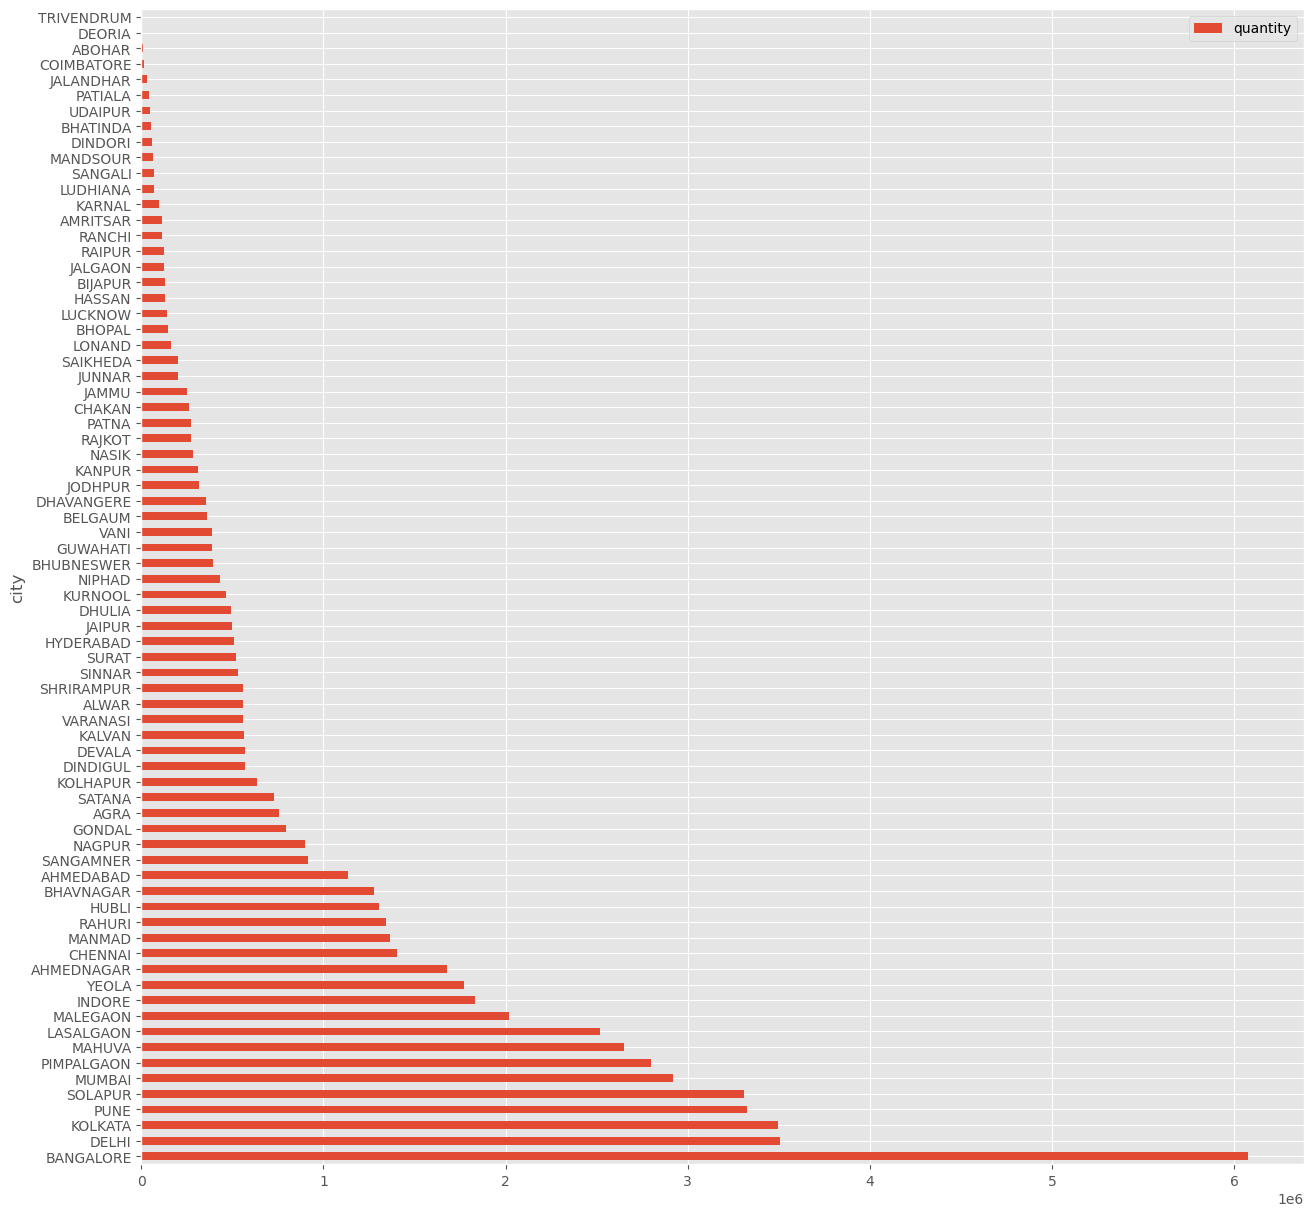

In [165]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
df2010City.plot(kind ="barh", x = 'city', y = 'quantity')

### Задание 2. Найти штат с наибольшими продажами в 2015 году

In [146]:
df2015 = df[df.year == 2015]
s = df2015.groupby('state')['quantity'].sum()
s

state
AP      2324618
ASM       36013
BHR      476800
DEL     3272139
GUJ     9752460
HR       146028
JH       121465
JK       246826
KEL         400
KER       60250
KNT    11797648
MP      2050187
MS     36493922
OR       319460
PB       939309
RAJ     1535482
TN      2314150
UP      2167951
WB      1364908
Name: quantity, dtype: int64

In [147]:
s.to_frame()
s = pd.DataFrame({'state':s.index, 'value':s.values})
s.max()

state          WB
value    36493922
dtype: object

### Задание 3. Вывести график кол-ва продаж в штате MS по всем городам в 2015 году

In [156]:
df_ms = df[(df['state'] == 'MS') & (df['year'] == 2015)]
df_ms = df_ms.groupby('city').sum()
df_ms.drop(['priceMin', 'priceMax', 'priceMod', 'year'], axis=1) #сумма продаж в 2015 году в каждом городе

,quantity
city,
AHMEDNAGAR,2444020
BOMBORI,3488
CHAKAN,16790
CHANDVAD,655749
DEVALA,979973
DHULIA,793761
DINDORI,12688
JALGAON,99113
JUNNAR,35394


Выведем график

<AxesSubplot:ylabel='city'>

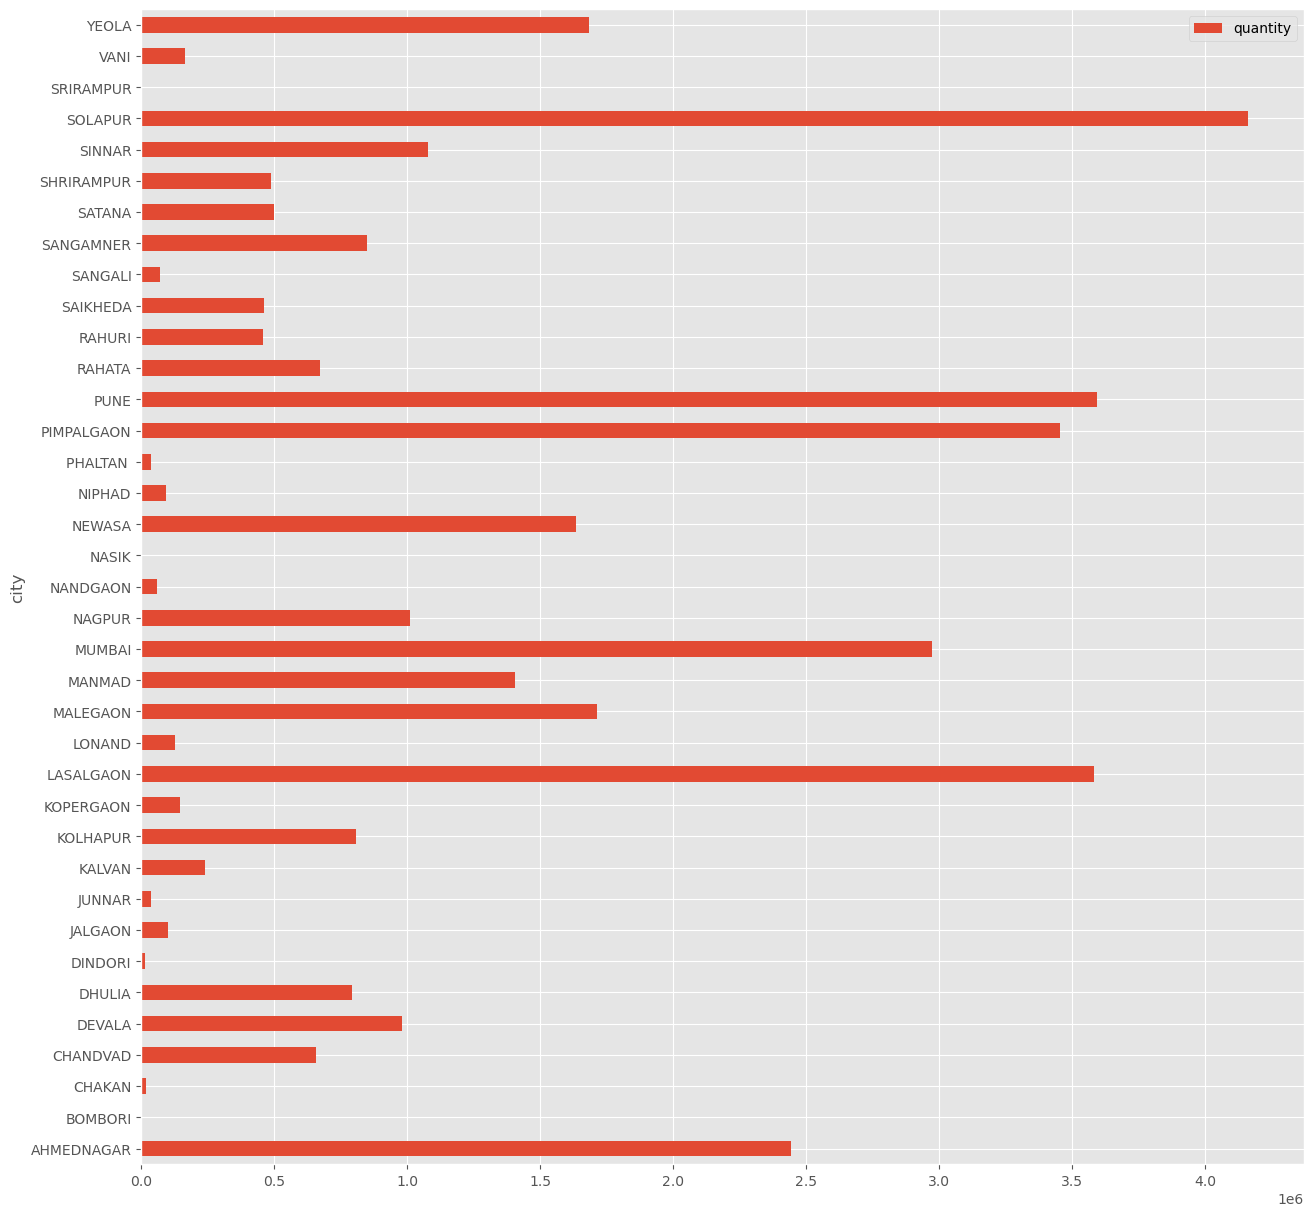

In [163]:
df_ms.plot(kind="barh", y ='quantity')

### Задание 4. Растет ли разброс цен в Бангалоре с годами?

In [41]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [42]:
dfBang = df[df.city == 'BANGALORE']

In [43]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
716,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
717,BANGALORE,January,2005,335679,470,597,522,KNT,BANGALORE,2005-01-01
718,BANGALORE,January,2006,412185,286,617,537,KNT,BANGALORE,2006-01-01
719,BANGALORE,January,2007,268268,586,1167,942,KNT,BANGALORE,2007-01-01
720,BANGALORE,January,2008,393806,174,671,472,KNT,BANGALORE,2008-01-01


In [44]:
dfBang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146.00,146.00,146.00,146.00,146.00
mean,2009.59,523917.42,557.54,1313.88,1043.55
std,3.52,302369.03,381.42,911.10,667.51
min,2004.00,63824.00,145.00,338.00,320.00
25%,2007.00,329690.00,307.00,685.00,551.00
50%,2010.00,403530.50,448.00,1019.00,836.00
75%,2013.00,661252.00,653.00,1636.00,1325.50
max,2016.00,1639032.00,2377.00,4698.00,3430.00


#### Установим Index как date

In [45]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
716,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
717,BANGALORE,January,2005,335679,470,597,522,KNT,BANGALORE,2005-01-01
718,BANGALORE,January,2006,412185,286,617,537,KNT,BANGALORE,2006-01-01
719,BANGALORE,January,2007,268268,586,1167,942,KNT,BANGALORE,2007-01-01
720,BANGALORE,January,2008,393806,174,671,472,KNT,BANGALORE,2008-01-01


In [46]:
dfBang.index

Int64Index([716, 717, 718, 719, 720, 721, 722, 723, 724, 725,
            ...
            852, 853, 854, 855, 856, 857, 858, 859, 860, 861],
           dtype='int64', length=146)

In [47]:
# Упорядочим по датам
dfBang = dfBang.sort_values(by = "date")
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
716,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
729,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
742,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
754,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
766,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


In [48]:
# Установим index
dfBang.index = pd.PeriodIndex(dfBang.date, freq='M')

In [49]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


#### Нарисуем графики

<AxesSubplot:xlabel='date'>

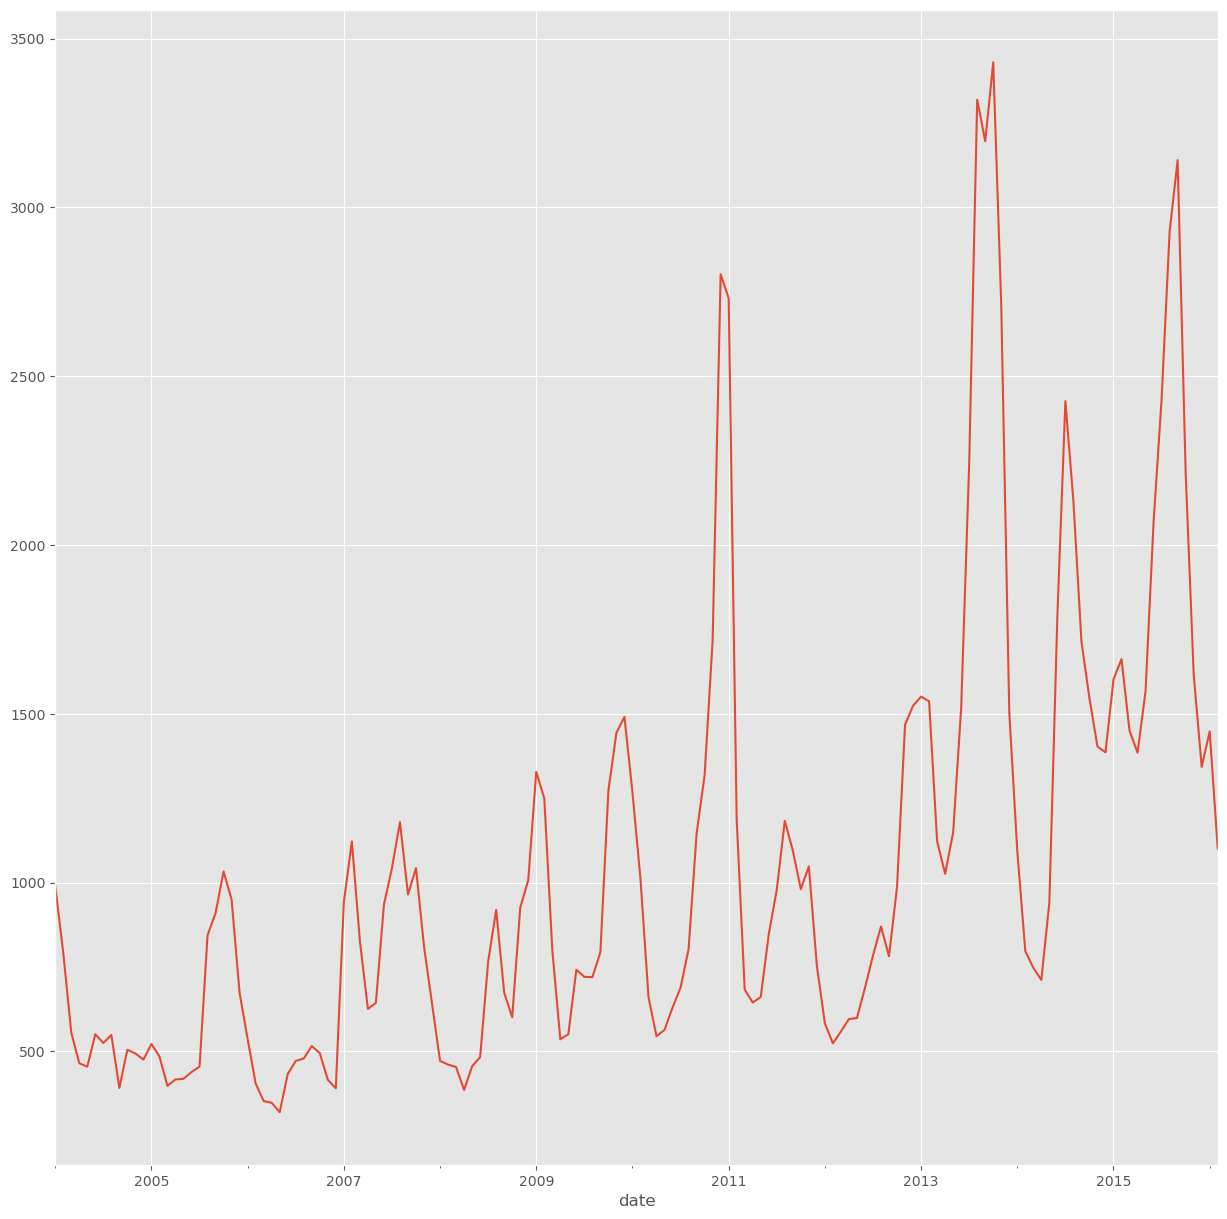

In [50]:
dfBang.priceMod.plot()

<AxesSubplot:xlabel='date'>

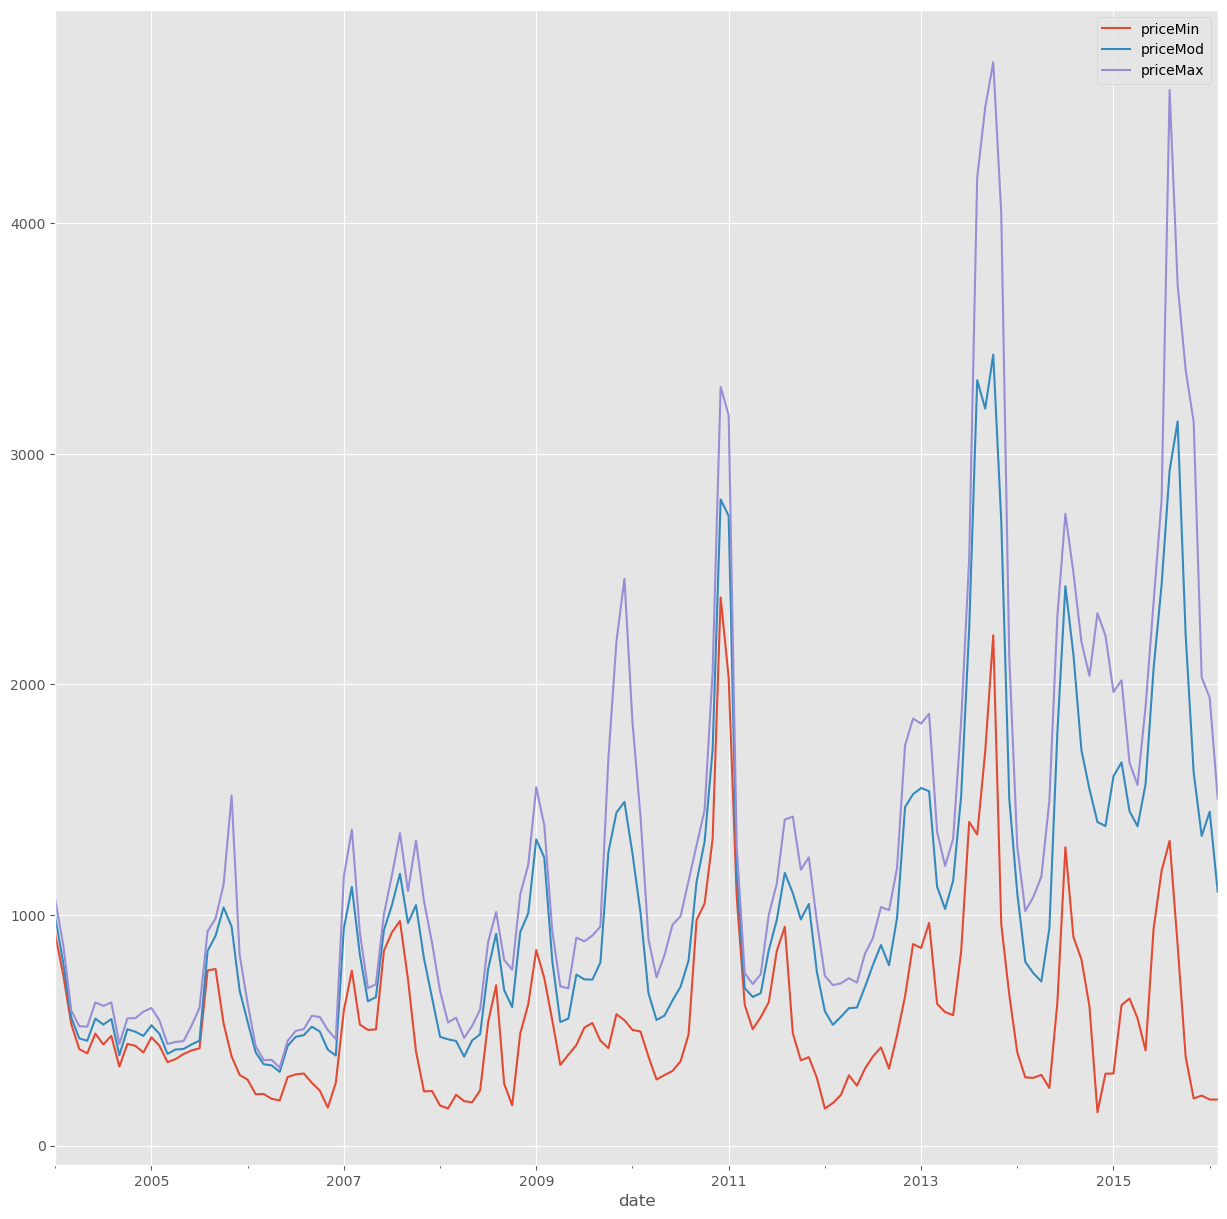

In [51]:
dfBang.plot(kind = "line", y = ['priceMin', 'priceMod', 'priceMax'])

Сразу 3 временных ряда на одних осях

Для расчета изменения создадим новый атрибут с разницей priceMax и priceMin  

In [52]:
dfBang['priceDiff'] = dfBang['priceMax'] - dfBang['priceMin']

In [53]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff
date,,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,150
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,129
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,59
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,99
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,116


Выведем график priceDiff

<AxesSubplot:xlabel='date'>

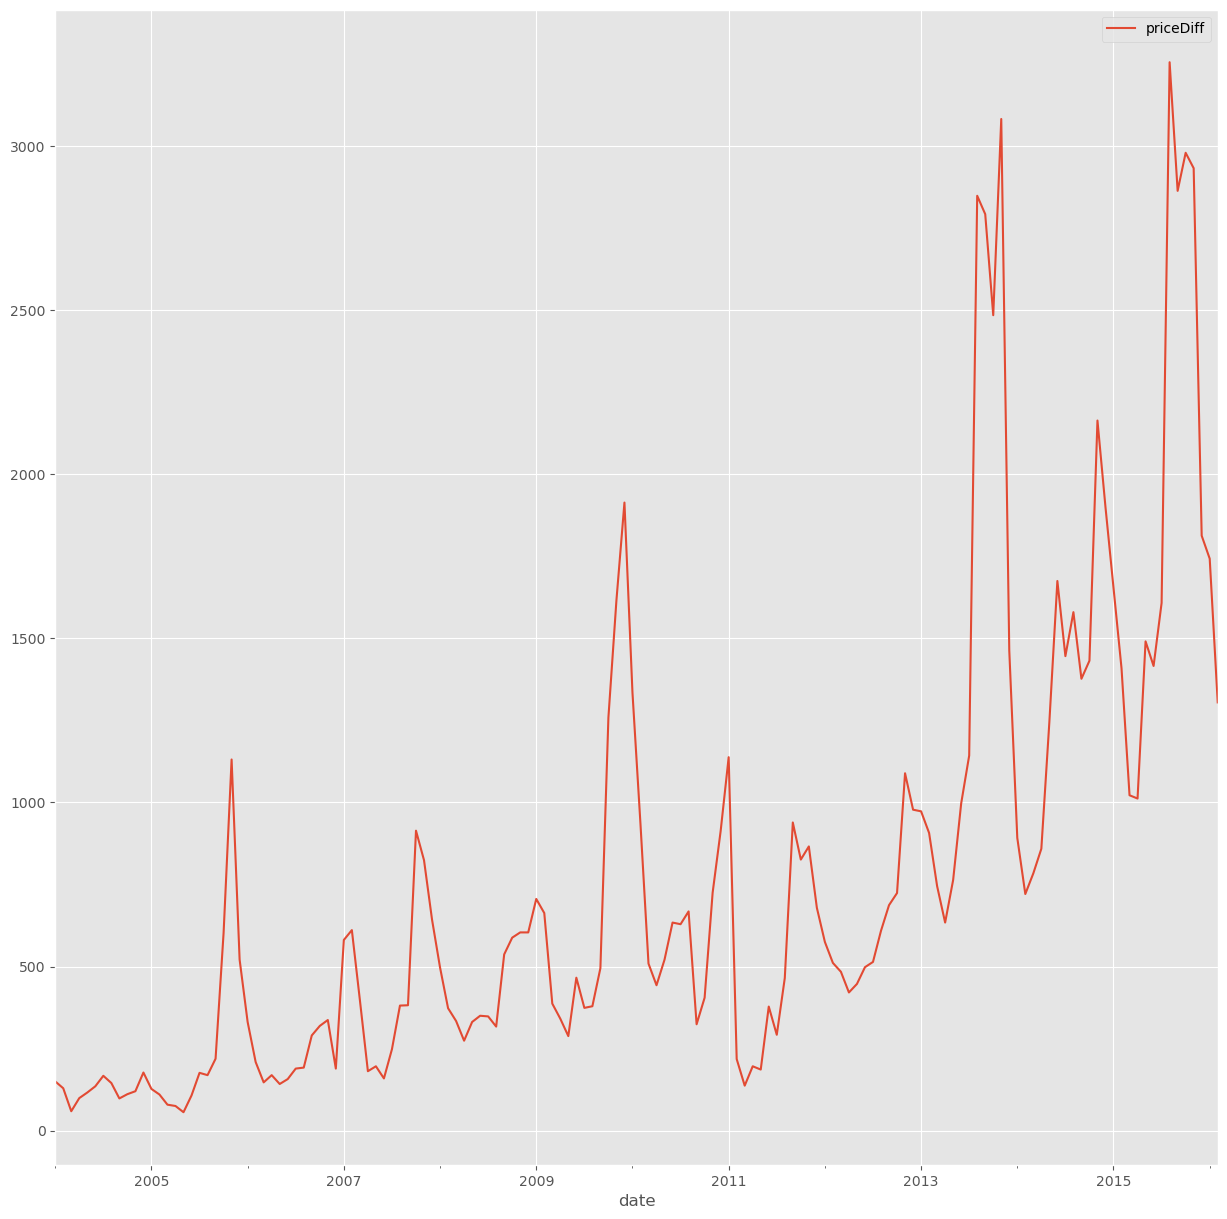

In [54]:
dfBang.plot(kind = 'line', y = 'priceDiff')

## Раздел 3. Прогнозирование временного ряда

#### 3. Прогнозирование временного ряда
#### 3.1 Прогнозирование средним (Mean Constant Model)
#### 3.2 Прогнозирование в будущее
#### 4. Выделение тренда и сезонности

### Подготовка данных

In [61]:
#отсортируем и добавим дату в индекс
df.index = pd.PeriodIndex(df.date, freq='M')
df.index.rename('date_ind', inplace = True)
df = df.sort_values(by = "date")

In [62]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date_ind,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Будем работать с данными в городе Бангалор

In [63]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [64]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date_ind,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


In [65]:
#Удалим лишние столбцы
dfBang = dfBang.drop(["market", "month", "year", "state", "city", "priceMin", "priceMax"], axis = 1)

In [66]:
dfBang.shape

(146, 3)

In [67]:
dfBang.head()

,quantity,priceMod,date
date_ind,,,
2004-01,227832,991,2004-01-01
2004-02,225133,793,2004-02-01
2004-03,221952,556,2004-03-01
2004-04,185150,465,2004-04-01
2004-05,137390,455,2004-05-01


<AxesSubplot:xlabel='date_ind'>

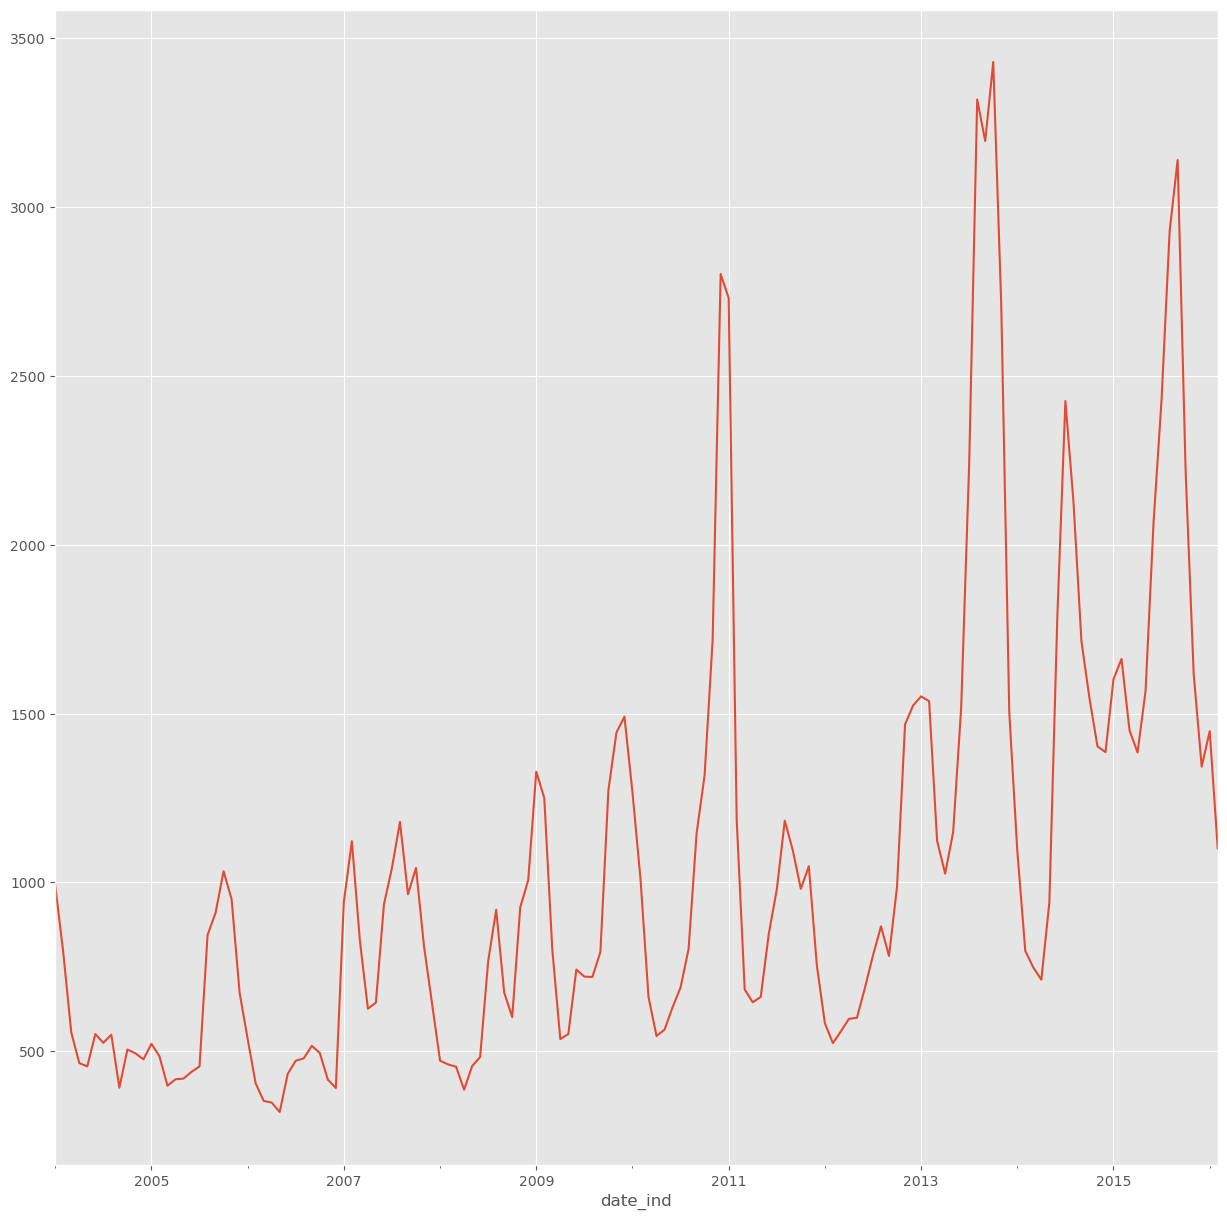

In [68]:
dfBang.priceMod.plot()

<AxesSubplot:xlabel='date_ind'>

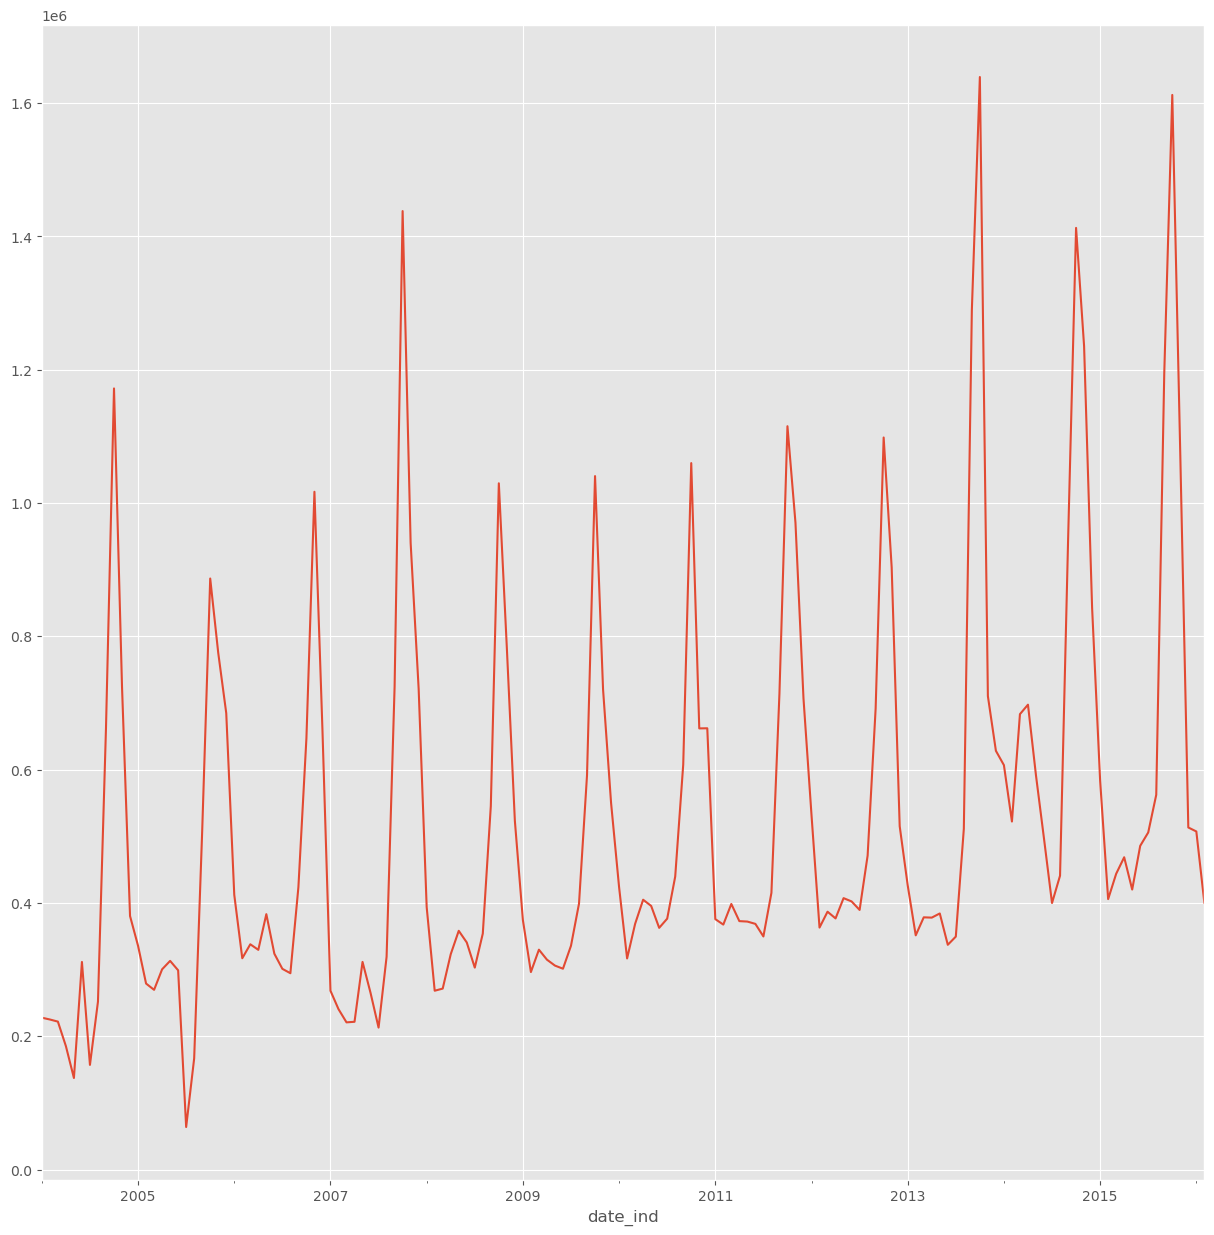

In [69]:
dfBang.quantity.plot()

### Логарифмическое преобразование данных
Логарифмирование помогает стабилизировать разброс значений.

<AxesSubplot:ylabel='Frequency'>

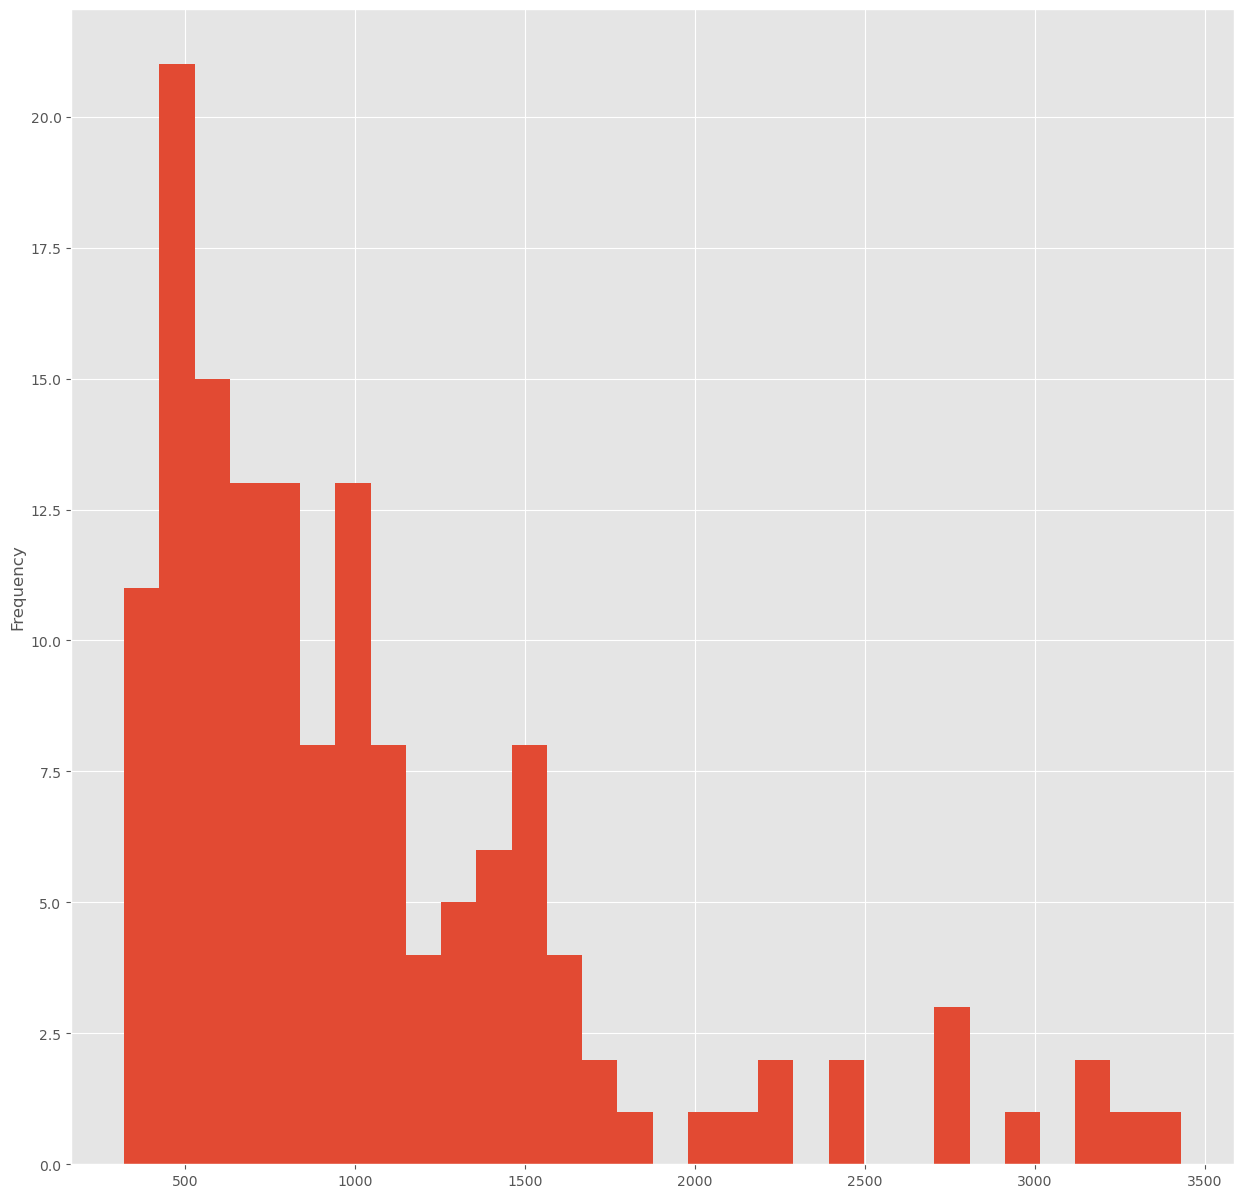

In [70]:
dfBang.priceMod.plot(kind = "hist", bins = 30)

При визуализации можем заметить, что есть данные, далеко отстающие от среднего значения, что может искажать модель регрессии. Наша задача минимизировать влияние таких данных. Желательно не исключая их.  
В этом случае самый распространенный вариант действия - логарифмирование переменной.

In [71]:
dfBang['priceModLog'] = np.log(dfBang.priceMod)
dfBang.head()

,quantity,priceMod,date,priceModLog
date_ind,,,,
2004-01,227832,991,2004-01-01,6.90
2004-02,225133,793,2004-02-01,6.68
2004-03,221952,556,2004-03-01,6.32
2004-04,185150,465,2004-04-01,6.14
2004-05,137390,455,2004-05-01,6.12


<AxesSubplot:ylabel='Frequency'>

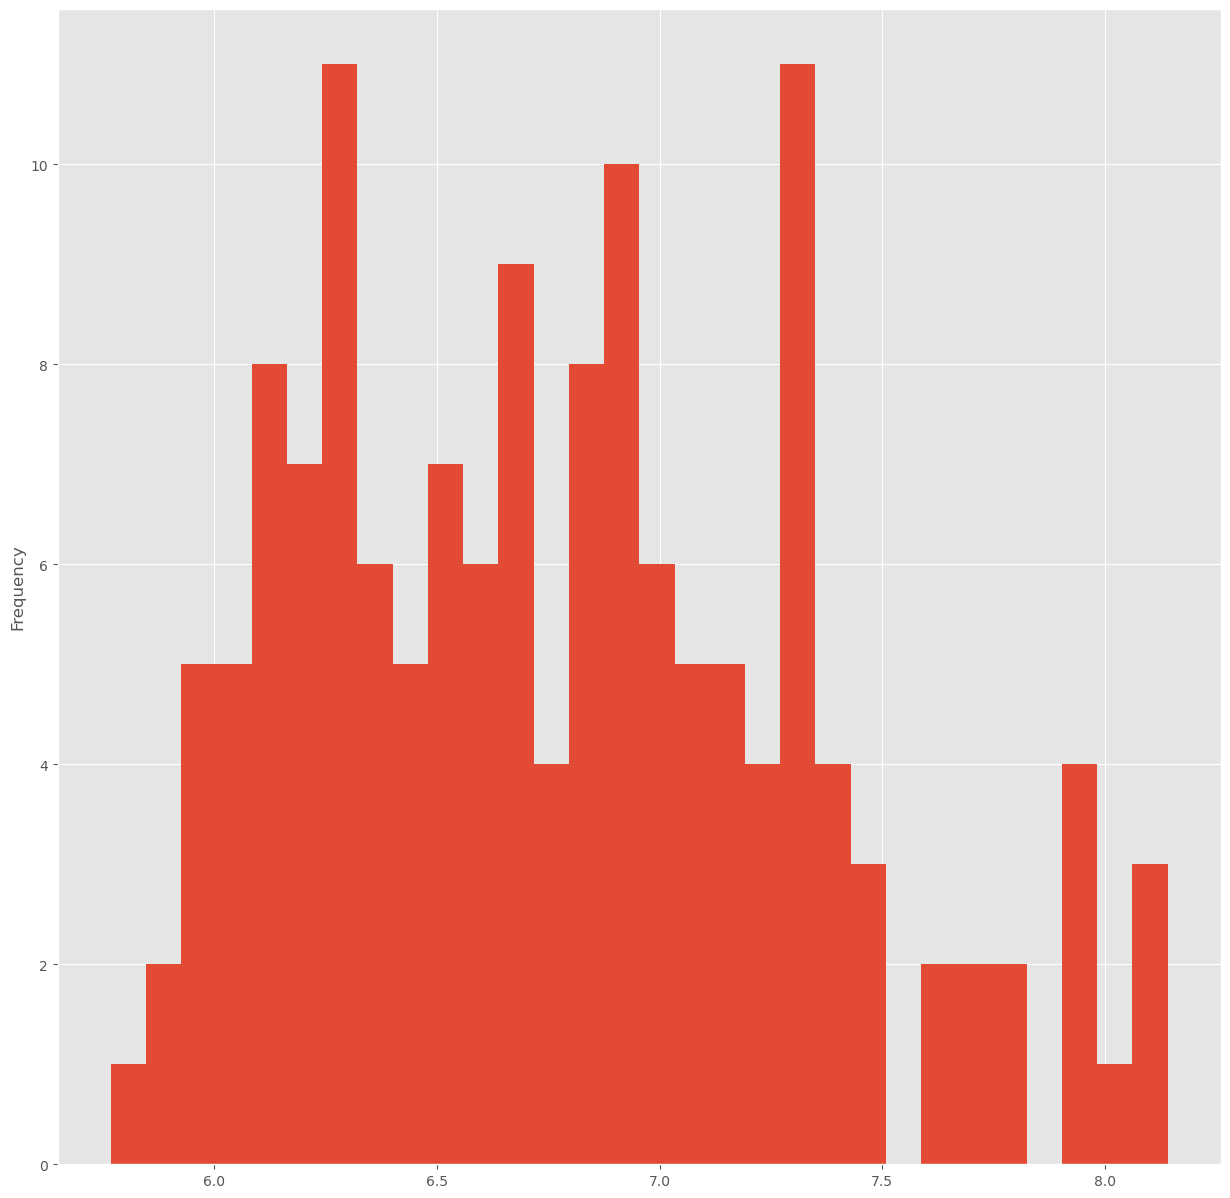

In [72]:
dfBang.priceModLog.plot(kind = "hist", bins = 30)

<AxesSubplot:xlabel='date_ind'>

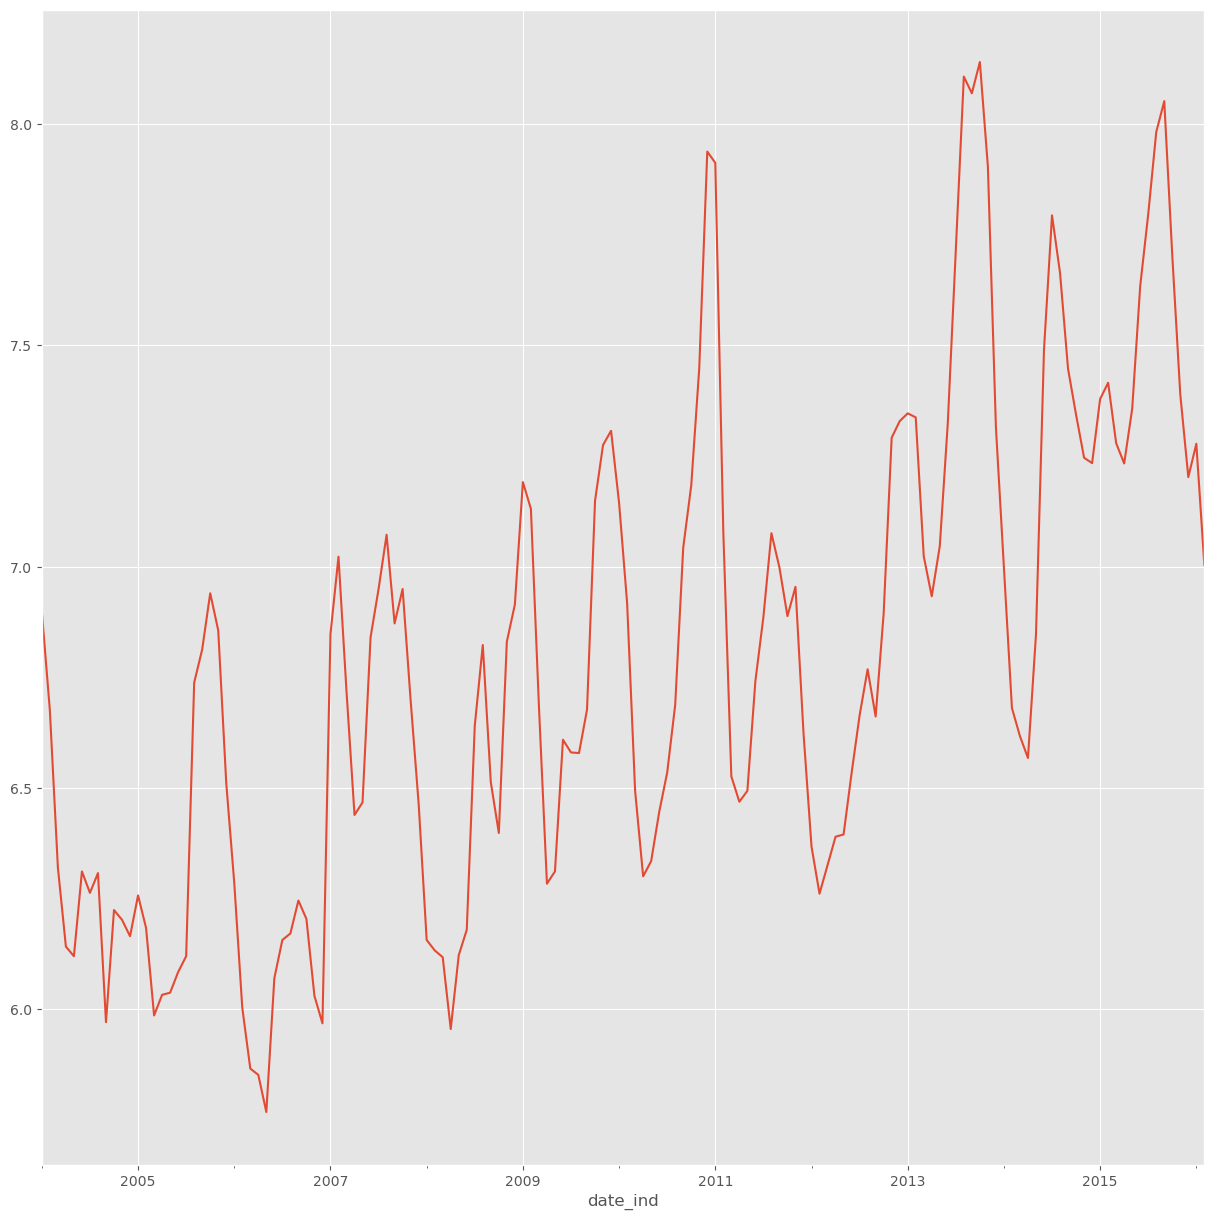

In [73]:
dfBang.priceModLog.plot()

## 3.1. Прогнозирование средним 

In [74]:
model_mean_pred = dfBang.priceModLog.mean()

In [164]:
# Запишем это значение в столбец priceMean
dfBang["priceMean"] = np.exp(model_mean_pred)

<AxesSubplot:xlabel='date'>

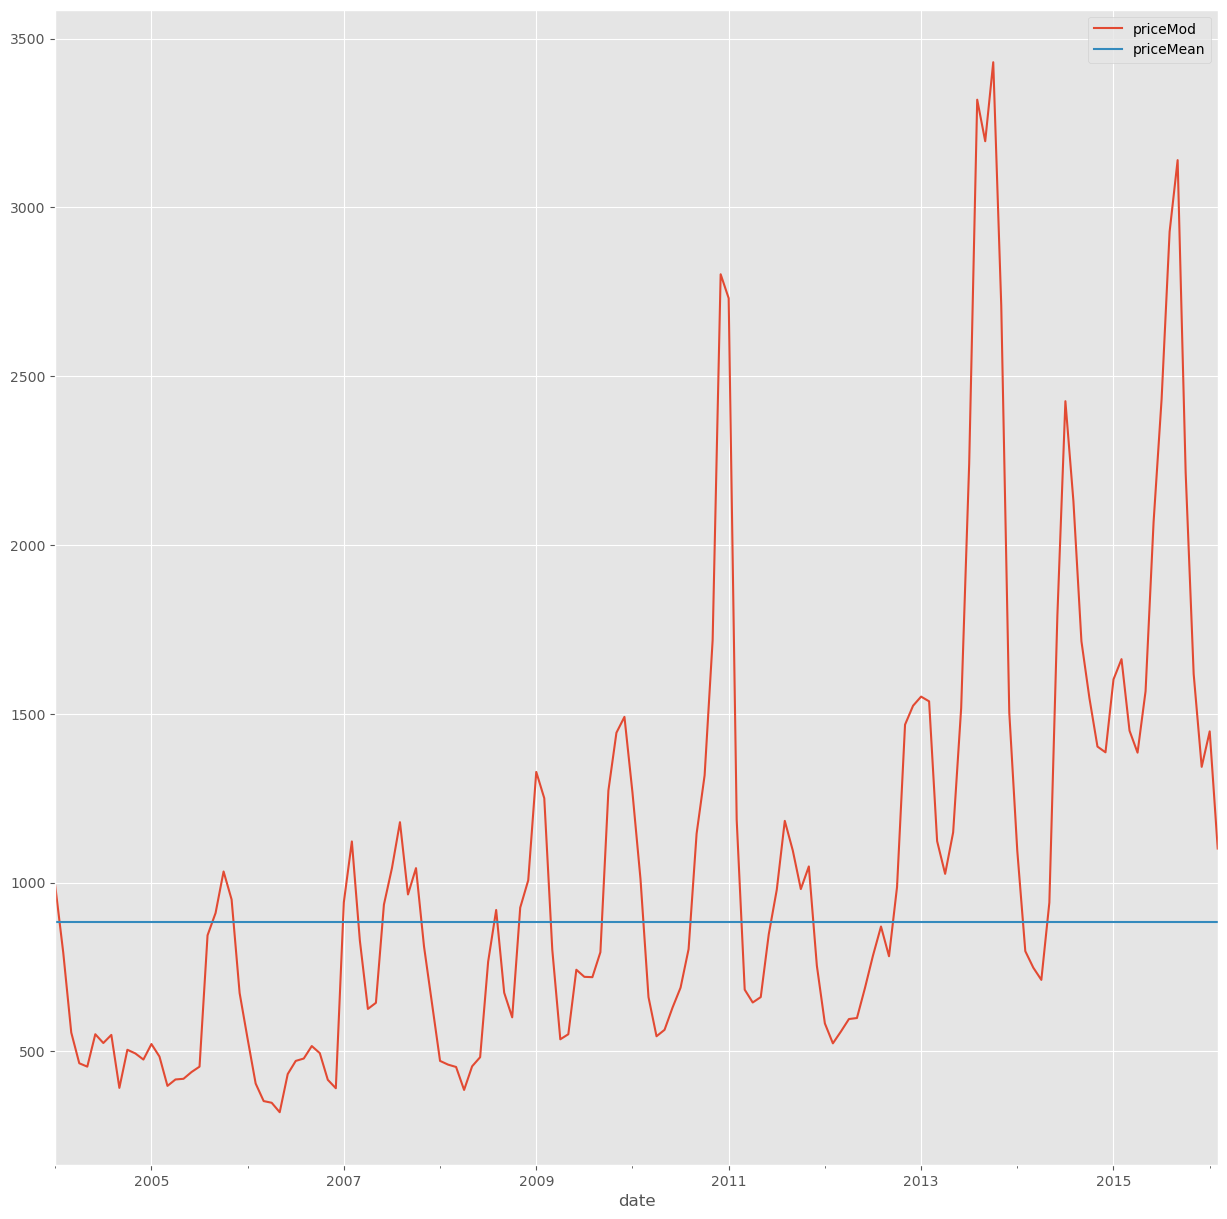

In [76]:
dfBang.plot(kind="line", x= 'date', y = ["priceMod", "priceMean"])

**Как мерить качество?**

Чтобы обучать регрессионные модели, нужно определиться, как именно измеряется качество предсказаний.   
Будем использовать метрику RMSE (Root Mean Squared Error) - корень среднего квадрата отклонения.

$$RMSE =  \sqrt{ \Sigma (\hat{y} - y)^2/n} $$ , 
где $\hat{y}$ это предсказанное значение y

In [77]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [78]:
model_mean_RMSE = RMSE(dfBang.priceMean, dfBang.priceMod)
model_mean_RMSE

683.9533483996255

In [79]:
dfBangResults = pd.DataFrame(columns = ["Model", "RMSE"])
dfBangResults.head()

,Model,RMSE


In [80]:
dfBangResults.loc[0,"Model"] = "Mean"
dfBangResults.loc[0,"RMSE"] = model_mean_RMSE
dfBangResults.head()

,Model,RMSE
0,Mean,683.95


### 3.2 Прогнозирование в будущее

Также мы можем обучить нашу модель на части выборки, чтобы осуществить прогноз в будущее. Для оставшихся данных в начале сделаем прогноз, затем оценим, насколько он был точный

In [113]:
dfBang.tail()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceLinearQuantity
date_ind,,,,,,,,
2015-10,1612160,2215,2015-10-01,7.70,884.57,141,1670.63,1913.49
2015-11,1071872,1618,2015-11-01,7.39,884.57,142,1686.21,1812.99
2015-12,513186,1343,2015-12-01,7.20,884.57,143,1701.93,1633.68
2016-01,507223,1448,2016-01-01,7.28,884.57,144,1717.81,1644.59
2016-02,400359,1101,2016-02-01,7.00,884.57,145,1733.83,1599.63


In [114]:
model_linear_quantity = smf.ols('priceModLog ~ timeIndex + np.log(quantity)', data = dfBang.iloc[:-15, :]).fit()
model_linear_quantity.predict(dfBang.iloc[-15:, :])

date_ind
2014-12   7.33
2015-01   7.29
2015-02   7.24
2015-03   7.26
2015-04   7.28
2015-05   7.27
2015-06   7.30
2015-07   7.31
2015-08   7.34
2015-09   7.45
2015-10   7.51
2015-11   7.45
2015-12   7.36
2016-01   7.36
2016-02   7.34
Freq: M, dtype: float64

In [115]:
prediction = np.exp(model_linear_quantity.predict(dfBang.iloc[-15:, :]).values)

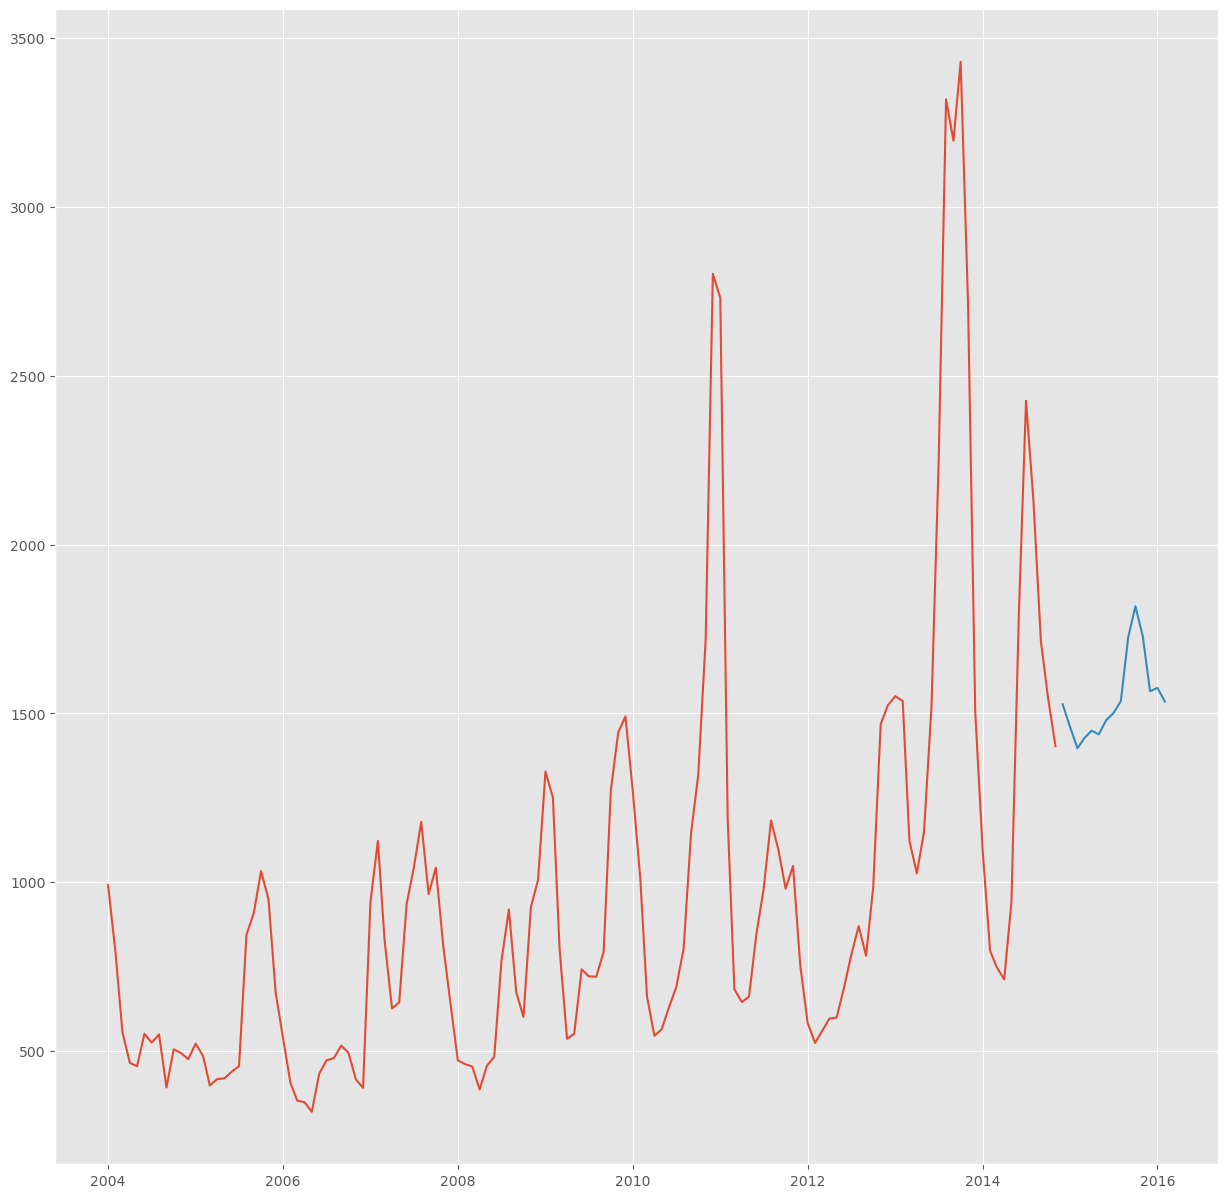

In [116]:
plt.plot(dfBang.date[:-15], dfBang['priceMod'][:-15])
plt.plot(dfBang.date[-15:], prediction)

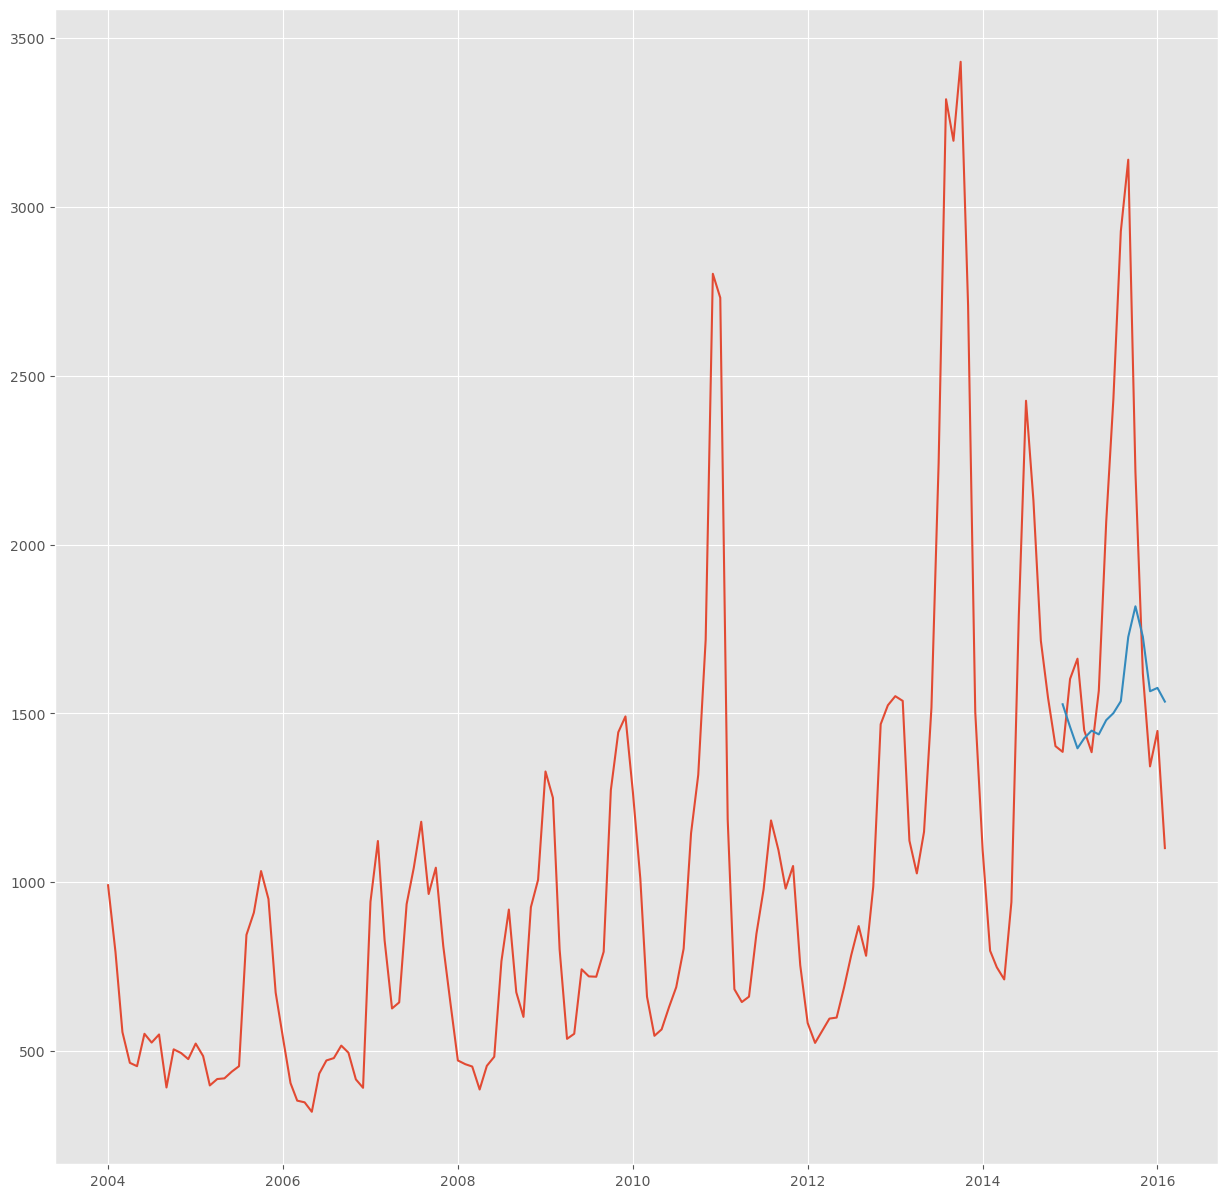

In [117]:
plt.plot(dfBang.date, dfBang['priceMod'])
plt.plot(dfBang.date[-15:], prediction)

## 4. Выделение тренда и сезонности

При работе с временными рядами выделяют два действия:
- Дифференцирование - расчет разницы с определенным временным лагом
- Декомпозиция - моделирование как тренда, так и сезонности и удаление их из модели.

Предположим, что у вас имеются ежемесячные данные о пассажиропотоке на международных авиалиниях.  
Объем пассажиропотока имеет во времени возрастающий линейный тренд, и в ряде имеется ежегодно повторяющаяся закономерность - сезонность (большинство перевозок приходится на летние месяцы, кроме того, имеется пик меньшей высоты в районе декабрьских каникул). 
Цель декомпозиции как раз и состоит в том, чтобы отделить эти компоненты, то есть разложить ряд на составляющую тренда, сезонную компоненту и оставшуюся нерегулярную составляющую. 

То есть каждый уровень временного ряда формируется под воздействием большого числа факторов, которые условно можно подразделить на три группы:
- факторы, формирующие тенденцию ряда
- факторы, формирующие циклические колебания ряда
- случайные факторы  

Рассмотрим воздействие каждого фактора на временной ряд в отдельности.  
Большинство временных рядов экономических показателей имеют тенденцию, 
характеризующую совокупное долговременное воздействие множества факторов на динамику изучаемого показателя.  
Все эти факторы, взятые в отдельности, могут оказывать разнонаправленное воздействие на исследуемый показатель. Однако в совокупности они формируют его возрастающую или убывающую тенденцию

В большинстве случаев фактический уровень временного ряда можно представить как сумму или произведение трендовой, циклической и случайной компонент. Модель, в которой временной ряд представлен как сумма перечисленных компонент, называется **аддитивной** моделью временного ряда. Модель, в которой временной ряд представлен как произведение перечисленных компонент, называется **мультипликативной** моделью временного ряда. 

**Аддитивная модель** 
$${Y_t} = t (trend) + s (seasonality) + r (residual)$$

![](https://miro.medium.com/max/1360/0*JWWglnH4RBR-SbxC.png)

**Мультипликативная модель** 
$${Y_t} = t (trend) * s (seasonality) * r (residual)$$

![](https://anomaly.io/wp-content/uploads/2015/12/multiplicative-model.png)

Как видим, отличие мультипликативной модели от аддитивной состоит в том, 
что в мультипликативной модели сезонная и случайная составляющие определены в виде относительных величин (коэффициентов), 
а в аддитивной модели – в виде абсолютных величин.   
Эти модели в практических расчетах дадут близкие результаты, если амплитуда колебаний уровней ряда слабо изменяется во времени

Какие примеры аддитивных и мультипликаативных рядов из жизни вы знаете?

### Декомпозиция 
Декомпозируем наш временной ряд на тренд и сезонность

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [120]:
dfBang.index = dfBang.index.to_timestamp()

In [121]:
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceLinearQuantity
date_ind,,,,,,,,
2004-01-01,227832,991,2004-01-01,6.90,884.57,0,451.29,431.41
2004-02-01,225133,793,2004-02-01,6.68,884.57,1,455.50,434.28
2004-03-01,221952,556,2004-03-01,6.32,884.57,2,459.75,437.01
2004-04-01,185150,465,2004-04-01,6.14,884.57,3,464.03,428.67
2004-05-01,137390,455,2004-05-01,6.12,884.57,4,468.36,413.03


In [122]:
decomposition = seasonal_decompose(dfBang.priceModLog, model = "additive")

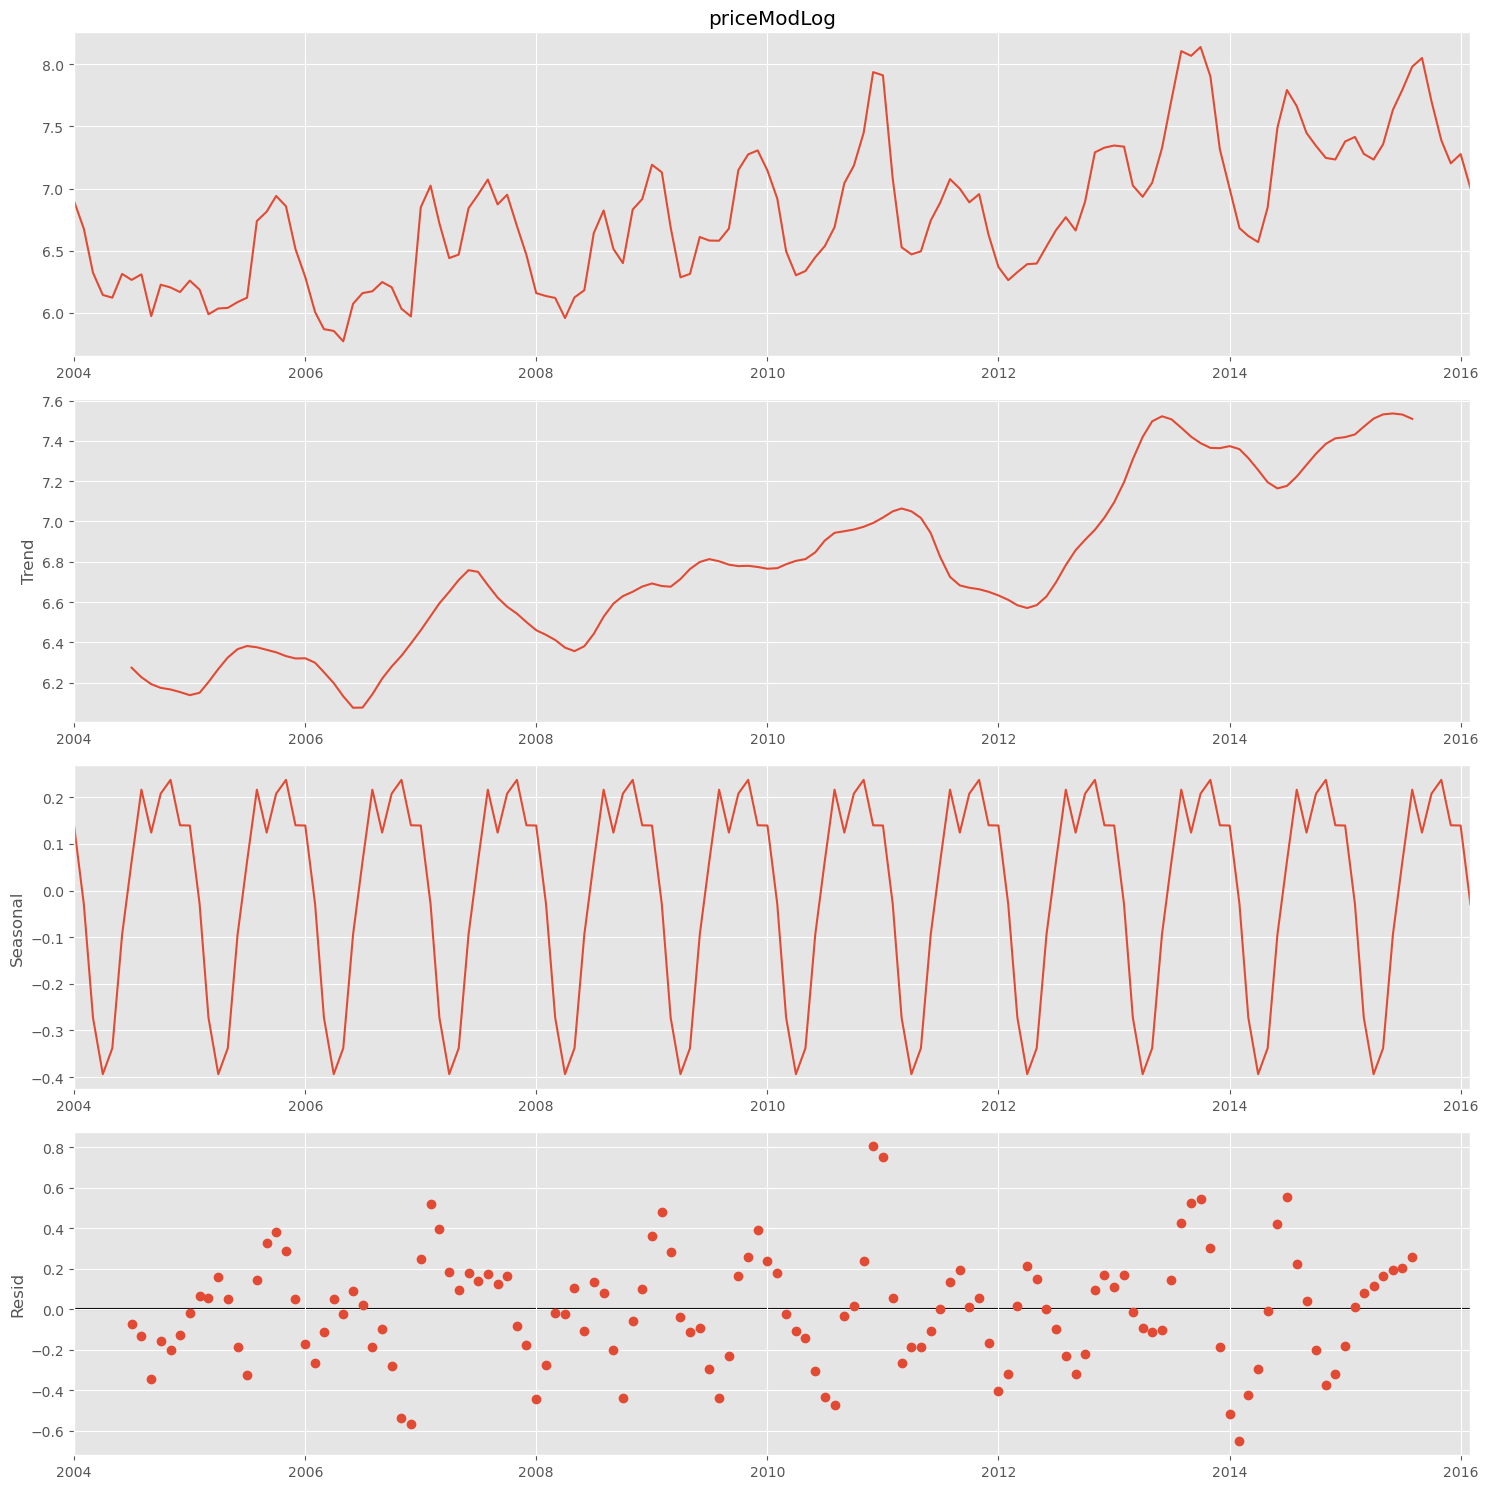

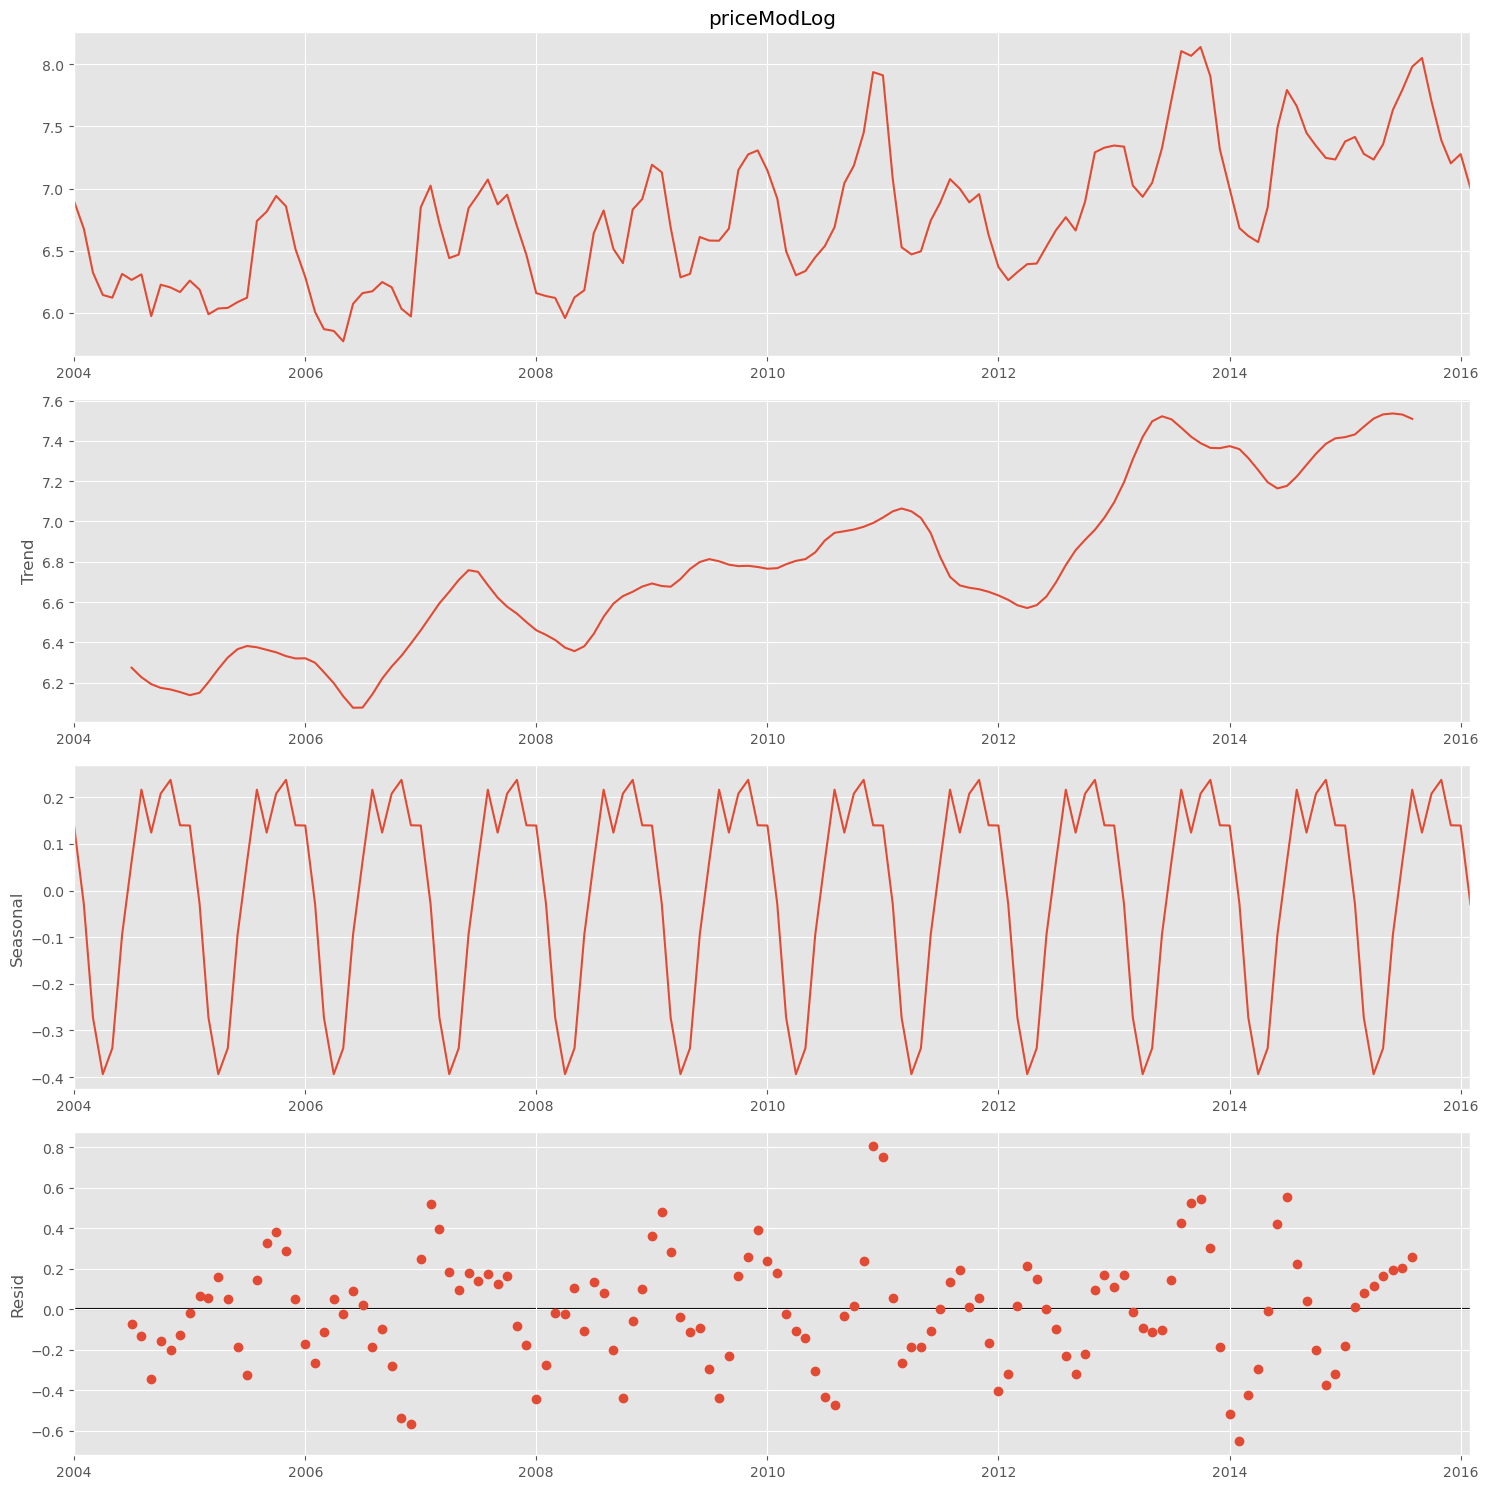

In [123]:
decomposition.plot()

In [124]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid